# Stochastic Methods

To better show the potential of stochastic optimizers with accelerators we perform a linear regression with his regularized version through a perceptron or single layer neural network. This problem, aka least squares problem, can be formalized as follows:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2$$

which change as follow if we introduce some L2 regulrization:

$$J(\theta) = \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{m}\sum_{j=1}^{n}\theta_{j}^{2}$$

where:

$$h_\theta(x^{(i)}) = \theta_0 x_0^{(i)} + \theta_1 x_1^{(i)} + \dots + \theta_n x_n^{(i)}$$

In [2]:
import numpy as np

from ml.utils import generate_centred_and_normalized_regression_data
from ml.neural_network.neural_network import NeuralNetworkRegressor
from ml.neural_network.layers import FullyConnected
from ml.neural_network.activations import linear
from ml.neural_network.losses import mean_squared_error
from ml.neural_network.regularizers import L2

from optimization.utils import plot_trajectory_optimization
from optimization.unconstrained.stochastic import *

X, y = generate_centred_and_normalized_regression_data()

The closed solution to linear regression is:

$$\theta^* = (X^TX)^{-1} X^T Y$$

which change as follow if we introduce some L2 regularization:

$$\theta^* = (X^TX + \lambda I)^{-1} X^T Y$$

In [3]:
lmbda = 10

In [4]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([ 14.86668171, -17.33116721])

In [5]:
np.linalg.inv(X.T.dot(X) + np.identity(2) * lmbda).dot(X.T).dot(y)

array([-0.1517181 , -0.25358334])

## Stochastic Gradient Descent

epoch	f(x)		f(x) - f*	rate
   0	1.9277e-01	6.8394e-02
 100	1.4783e-01	2.3448e-02	3.4284e-01
 200	1.3193e-01	7.5559e-03	3.2224e-01
 300	1.2681e-01	2.4348e-03	3.2224e-01
 400	1.2516e-01	7.8458e-04	3.2224e-01
 500	1.2463e-01	2.5282e-04	3.2224e-01
 600	1.2446e-01	8.1468e-05	3.2224e-01
 700	1.2441e-01	2.6252e-05	3.2224e-01
 800	1.2439e-01	8.4593e-06	3.2224e-01
 900	1.2438e-01	2.7259e-06	3.2224e-01
1000	1.2438e-01	8.7839e-07	3.2224e-01

[ 14.6493787  -17.13468383]


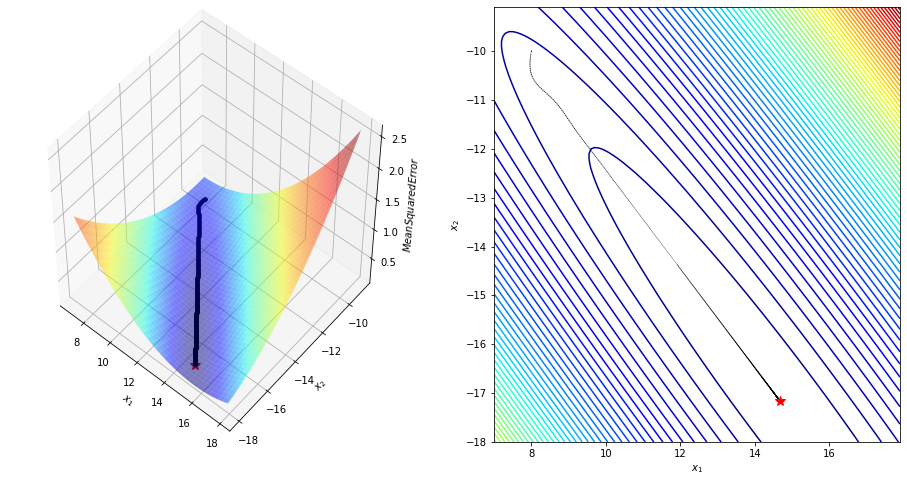

In [6]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=StochasticGradientDescent, 
                             learning_rate=0.8, momentum_type='nesterov', momentum=0.9, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	f(x)		f(x) - f*	rate
   0	3.6198e+01	3.5608e+01
 100	5.9395e-01	4.2890e-03	1.2045e-04
 200	5.9392e-01	4.2589e-03	9.9299e-01
 300	5.9392e-01	4.2589e-03	1.0000e+00
 400	5.9392e-01	4.2589e-03	1.0000e+00
 500	5.9392e-01	4.2589e-03	1.0000e+00
 600	5.9392e-01	4.2589e-03	1.0000e+00
 700	5.9392e-01	4.2589e-03	1.0000e+00
 800	5.9392e-01	4.2589e-03	1.0000e+00
 900	5.9392e-01	4.2589e-03	1.0000e+00
1000	5.9392e-01	4.2589e-03	1.0000e+00

[-0.07714253 -0.12808607]


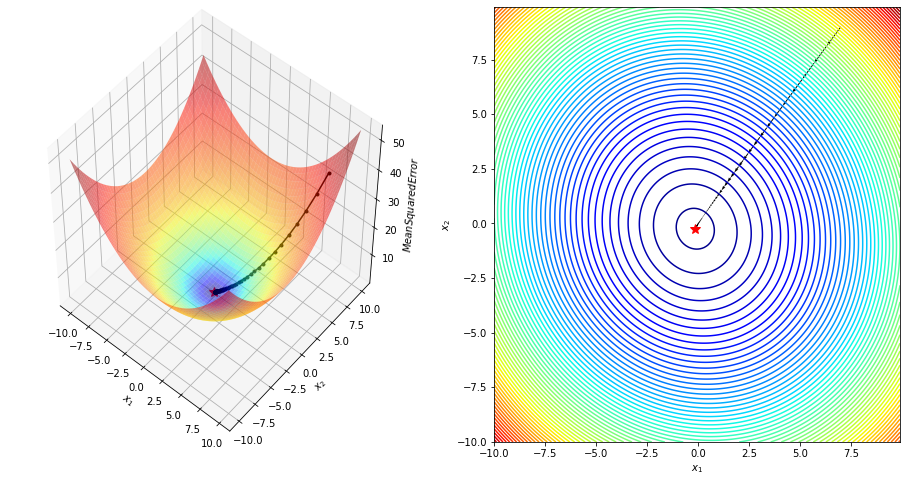

In [7]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=StochasticGradientDescent, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## Adam

epoch	f(x)		f(x) - f*	rate
   0	1.9957e-01	7.7417e-02
 100	1.6457e-01	4.2419e-02	5.4794e-01
 200	1.4182e-01	1.9664e-02	4.6357e-01
 300	1.3001e-01	7.8592e-03	3.9966e-01
 400	1.2483e-01	2.6802e-03	3.4103e-01
 500	1.2292e-01	7.7201e-04	2.8804e-01
 600	1.2234e-01	1.8652e-04	2.4160e-01
 700	1.2219e-01	3.7610e-05	2.0165e-01
 800	1.2216e-01	6.3000e-06	1.6751e-01
 900	1.2215e-01	8.7156e-07	1.3834e-01
1000	1.2215e-01	9.8855e-08	1.1342e-01

[ 15.15411855 -17.64522965]


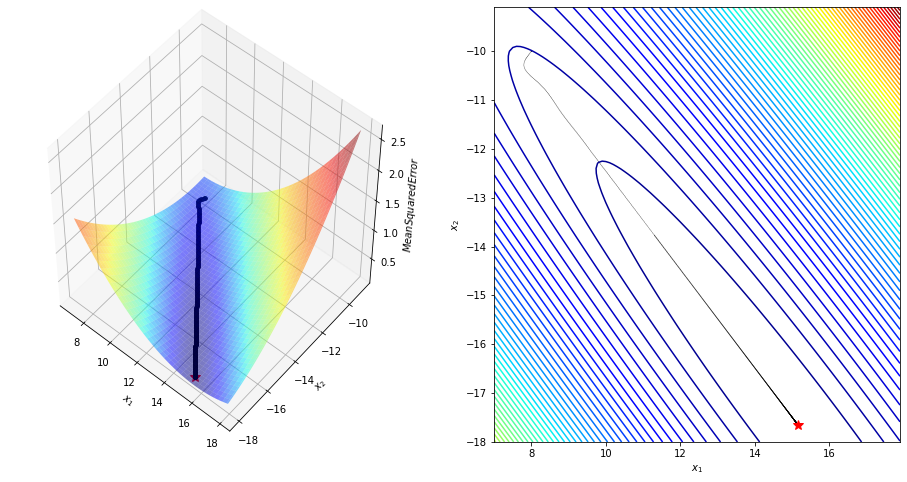

In [8]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=Adam, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.6, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	f(x)		f(x) - f*	rate
   0	3.5801e+01	3.5240e+01
 100	5.6107e-01	4.7164e-04	1.3383e-05
 200	5.6387e-01	3.2669e-03	6.9268e+00
 300	5.6388e-01	3.2751e-03	1.0025e+00
 400	5.6387e-01	3.2733e-03	9.9944e-01
 500	5.6387e-01	3.2718e-03	9.9953e-01
 600	5.6387e-01	3.2716e-03	9.9995e-01
 700	5.6387e-01	3.2723e-03	1.0002e+00
 800	5.6387e-01	3.2733e-03	1.0003e+00
 900	5.6387e-01	3.2742e-03	1.0003e+00
1000	5.6388e-01	3.2747e-03	1.0002e+00

[-0.06557848 -0.11302644]


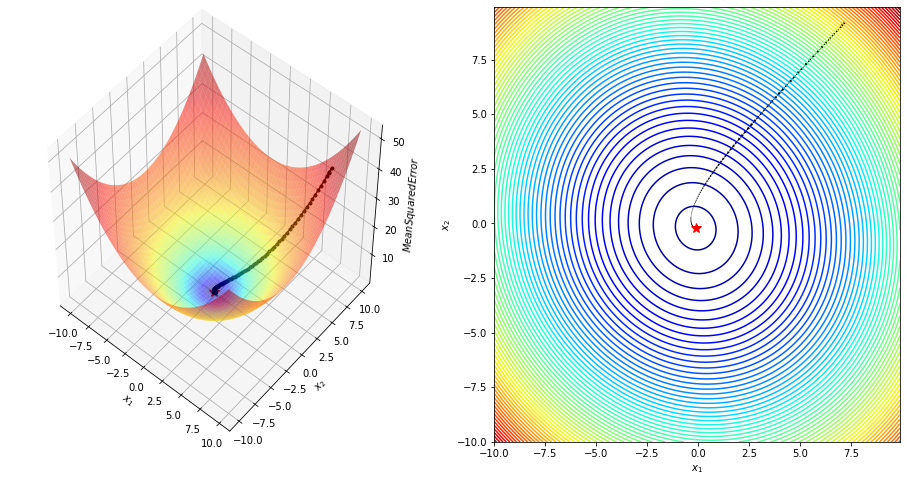

In [9]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=Adam, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AdaMax

epoch	f(x)		f(x) - f*	rate
   0	2.0247e-01	7.3726e-02
 100	1.6853e-01	3.9779e-02	5.3955e-01
 200	1.4880e-01	2.0051e-02	5.0408e-01
 300	1.3812e-01	9.3735e-03	4.6747e-01
 400	1.3277e-01	4.0262e-03	4.2953e-01
 500	1.3032e-01	1.5731e-03	3.9072e-01
 600	1.2930e-01	5.5276e-04	3.5138e-01
 700	1.2892e-01	1.7241e-04	3.1191e-01
 800	1.2879e-01	4.7031e-05	2.7278e-01
 900	1.2876e-01	1.1029e-05	2.3450e-01
1000	1.2875e-01	2.1797e-06	1.9763e-01

[ 15.06786769 -17.44720126]


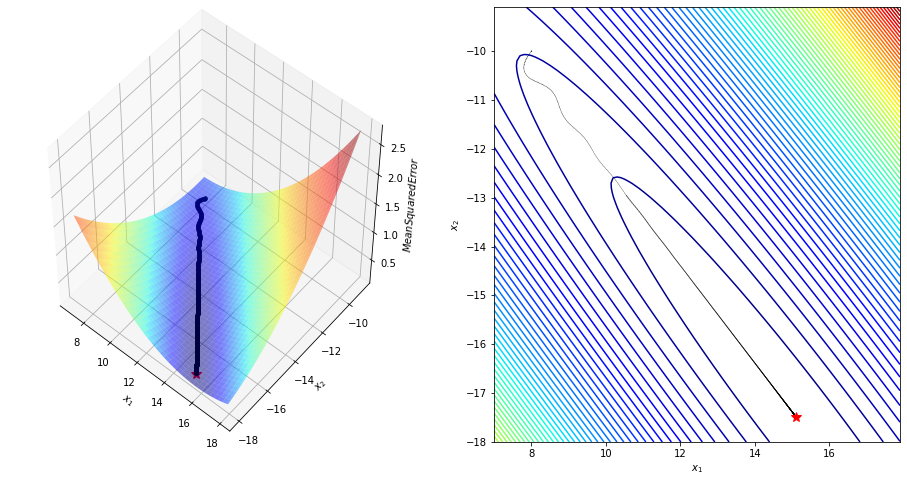

In [13]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaMax, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.8, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	f(x)		f(x) - f*	rate
   0	3.6421e+01	3.5892e+01
 100	6.3729e-01	1.0921e-01	3.0428e-03
 200	5.3302e-01	4.9412e-03	4.5243e-02
 300	5.3223e-01	4.1470e-03	8.3926e-01
 400	5.3221e-01	4.1335e-03	9.9676e-01
 500	5.3221e-01	4.1305e-03	9.9927e-01
 600	5.3221e-01	4.1283e-03	9.9947e-01
 700	5.3221e-01	4.1271e-03	9.9970e-01
 800	5.3221e-01	4.1269e-03	9.9995e-01
 900	5.3221e-01	4.1277e-03	1.0002e+00
1000	5.3221e-01	4.1292e-03	1.0004e+00

[-0.07927737 -0.12497538]


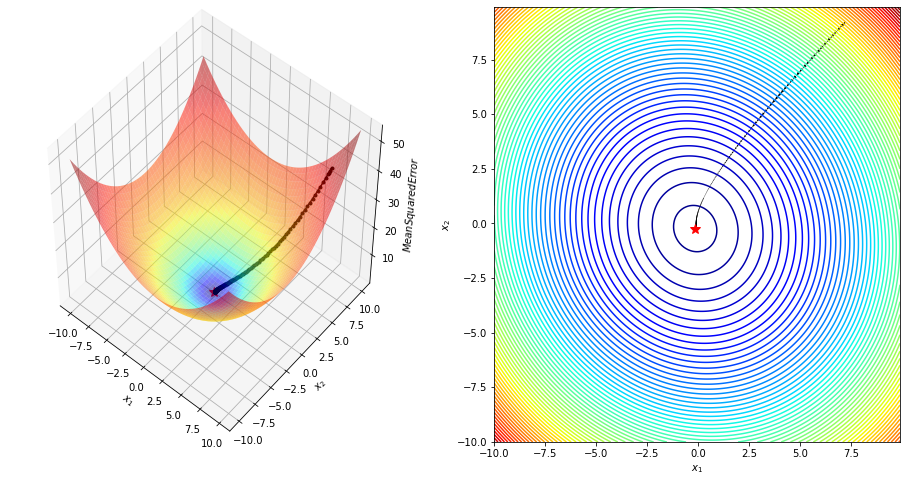

In [37]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaMax, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AMSGrad

epoch	f(x)		f(x) - f*	rate
   0	1.8531e-01	5.2336e-02
 100	1.3308e-01	1.0463e-04	1.9992e-03
 200	1.3299e-01	2.0901e-05	1.9976e-01
 300	1.3297e-01	2.0119e-08	9.6256e-04
 400	1.3297e-01	2.0097e-06	9.9893e+01
 500	1.3297e-01	1.1836e-07	5.8893e-02
 600	1.3297e-01	1.4226e-07	1.2019e+00
 700	1.3297e-01	3.5618e-08	2.5037e-01
 800	1.3297e-01	6.3744e-09	1.7897e-01
 900	1.3297e-01	5.8860e-09	9.2338e-01
1000	1.3297e-01	8.3584e-11	1.4200e-02

[ 14.01874933 -16.26499561]


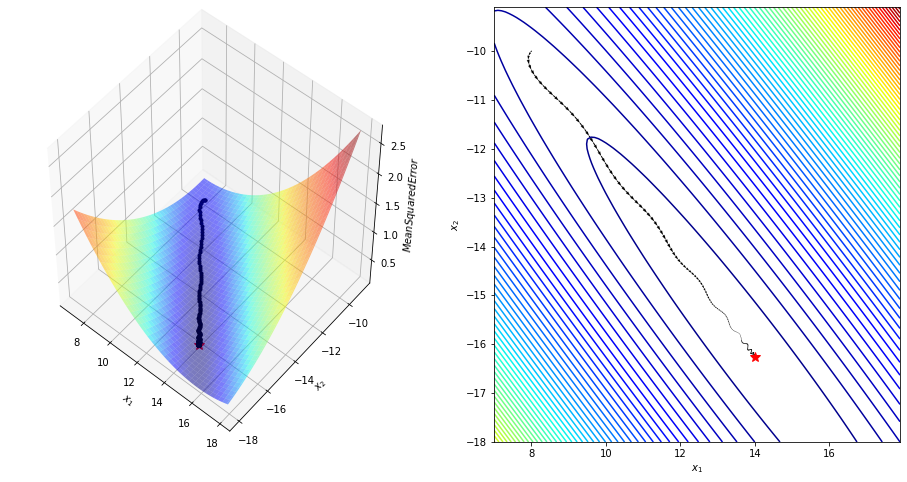

In [38]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AMSGrad, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.6, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	f(x)		f(x) - f*	rate
   0	3.6051e+01	3.5556e+01
 100	4.9948e-01	4.9501e-03	1.3922e-04
 200	4.9857e-01	4.0364e-03	8.1543e-01
 300	4.9855e-01	4.0214e-03	9.9628e-01
 400	4.9855e-01	4.0214e-03	1.0000e+00
 500	4.9855e-01	4.0214e-03	1.0000e+00
 600	4.9855e-01	4.0214e-03	1.0000e+00
 700	4.9855e-01	4.0214e-03	1.0000e+00
 800	4.9855e-01	4.0214e-03	1.0000e+00
 900	4.9855e-01	4.0214e-03	1.0000e+00
1000	4.9855e-01	4.0214e-03	1.0000e+00

[-0.08207737 -0.12029741]


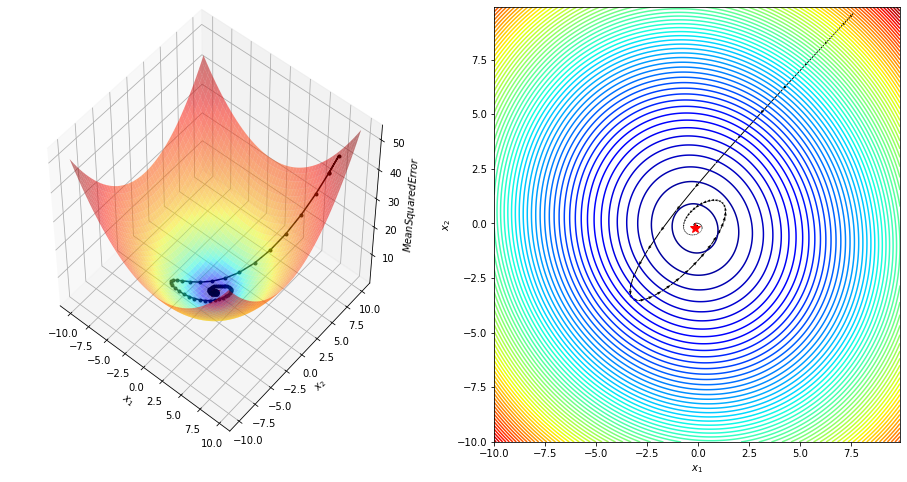

In [39]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AMSGrad, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AdaDelta

epoch	f(x)		f(x) - f*	rate
   0	1.6615e-01	4.3730e-02
 100	1.2242e-01	3.0564e-07	6.9891e-06
 200	1.2242e-01	1.0228e-06	3.3466e+00
 300	1.2242e-01	3.4613e-07	3.3841e-01
 400	1.2242e-01	1.2131e-07	3.5046e-01
 500	1.2242e-01	4.2524e-08	3.5055e-01
 600	1.2242e-01	1.4907e-08	3.5055e-01
 700	1.2242e-01	5.2255e-09	3.5055e-01
 800	1.2242e-01	1.8318e-09	3.5055e-01
 900	1.2242e-01	6.4215e-10	3.5055e-01
1000	1.2242e-01	2.2511e-10	3.5055e-01

[ 13.78992469 -15.89197783]


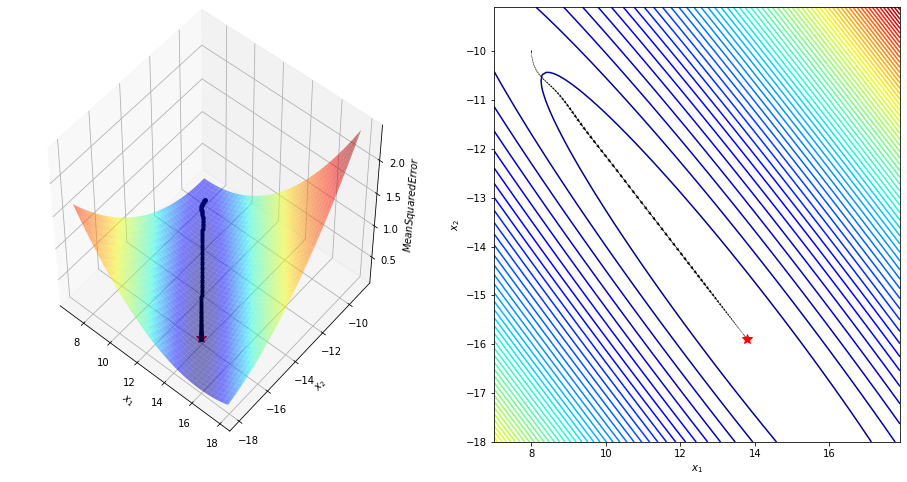

In [42]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaDelta, learning_rate=0.8, 
                             momentum_type='nesterov', momentum=0.9, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	f(x)		f(x) - f*	rate
   0	3.5362e+01	3.4869e+01
 100	1.5518e+01	1.5025e+01	4.3090e-01
 200	7.1851e+00	6.6915e+00	4.4536e-01
 300	2.9139e+00	2.4203e+00	3.6170e-01
 400	1.0357e+00	5.4209e-01	2.2398e-01
 500	5.3865e-01	4.5035e-02	8.3077e-02
 600	4.9629e-01	2.6697e-03	5.9279e-02
 700	4.9626e-01	2.6400e-03	9.8888e-01
 800	4.9626e-01	2.6400e-03	1.0000e+00
 900	4.9626e-01	2.6400e-03	1.0000e+00
1000	4.9626e-01	2.6400e-03	1.0000e+00

[-0.05871341 -0.10120599]


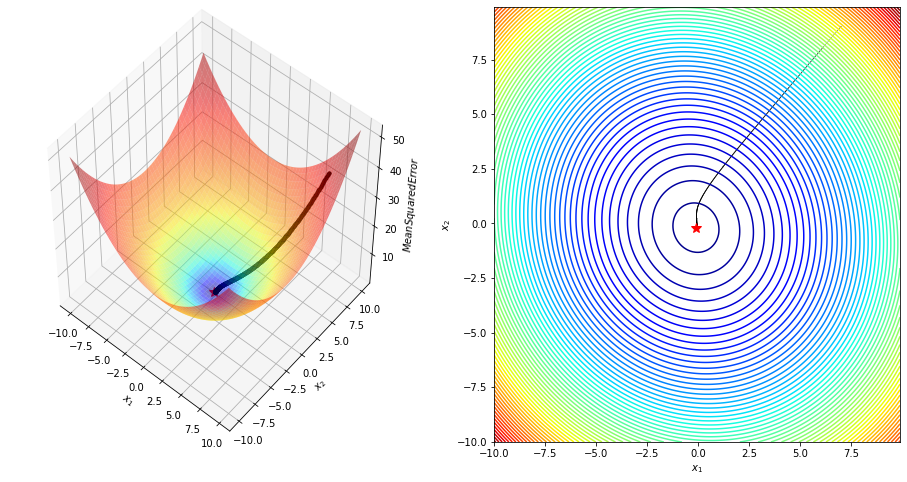

In [43]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaDelta, learning_rate=0.9, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## RProp

epoch	f(x)		f(x) - f*	rate
   0	1.6434e-01	3.9202e-02
 100	1.3304e-01	7.9054e-03	2.0166e-01
 200	1.2542e-01	2.8107e-04	3.5554e-02
 300	1.2514e-01	7.7503e-06	2.7574e-02
 400	1.2514e-01	2.6408e-07	3.4073e-02
 500	1.2514e-01	6.7914e-09	2.5717e-02
 600	1.2514e-01	2.4599e-10	3.6222e-02
 700	1.2514e-01	3.7922e-12	1.5416e-02
 800	1.2514e-01	3.6596e-13	9.6502e-02
 900	1.2514e-01	2.2579e-13	6.1699e-01
1000	1.2514e-01	2.2579e-13	1.0000e+00

[ 13.22917982 -15.50303401]


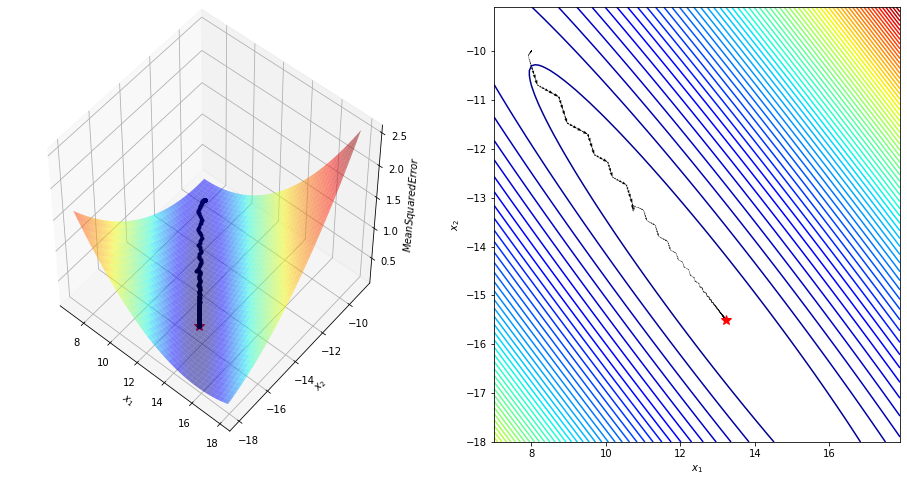

In [44]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RProp, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.5, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	f(x)		f(x) - f*	rate
   0	3.6099e+01	3.5581e+01
 100	5.2182e-01	3.8600e-03	1.0849e-04
 200	5.2184e-01	3.8811e-03	1.0055e+00
 300	5.2184e-01	3.8811e-03	1.0000e+00
 400	5.2184e-01	3.8811e-03	1.0000e+00
 500	5.2184e-01	3.8811e-03	1.0000e+00
 600	5.2184e-01	3.8811e-03	1.0000e+00
 700	5.2184e-01	3.8811e-03	1.0000e+00
 800	5.2184e-01	3.8811e-03	1.0000e+00
 900	5.2184e-01	3.8811e-03	1.0000e+00
1000	5.2184e-01	3.8811e-03	1.0000e+00

[-0.07654228 -0.120719  ]


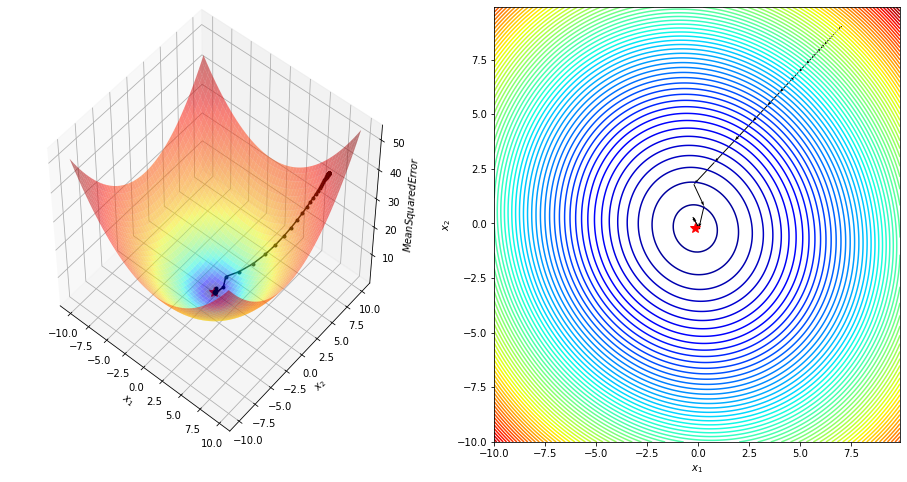

In [45]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RProp, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## RMSProp

epoch	f(x)		f(x) - f*	rate
   0	1.6990e-01	4.9436e-02
 100	1.6408e-01	4.3619e-02	8.8232e-01
 200	1.3665e-01	1.6182e-02	3.7100e-01
 300	1.2245e-01	1.9818e-03	1.2246e-01
 400	1.2047e-01	1.6069e-06	8.1084e-04
 500	1.2047e-01	7.6402e-07	4.7546e-01
 600	1.2047e-01	7.9383e-07	1.0390e+00
 700	1.2047e-01	7.9399e-07	1.0002e+00
 800	1.2047e-01	7.9399e-07	1.0000e+00
 900	1.2047e-01	7.9399e-07	1.0000e+00
1000	1.2047e-01	7.9399e-07	1.0000e+00

[ 13.95339494 -16.11184851]


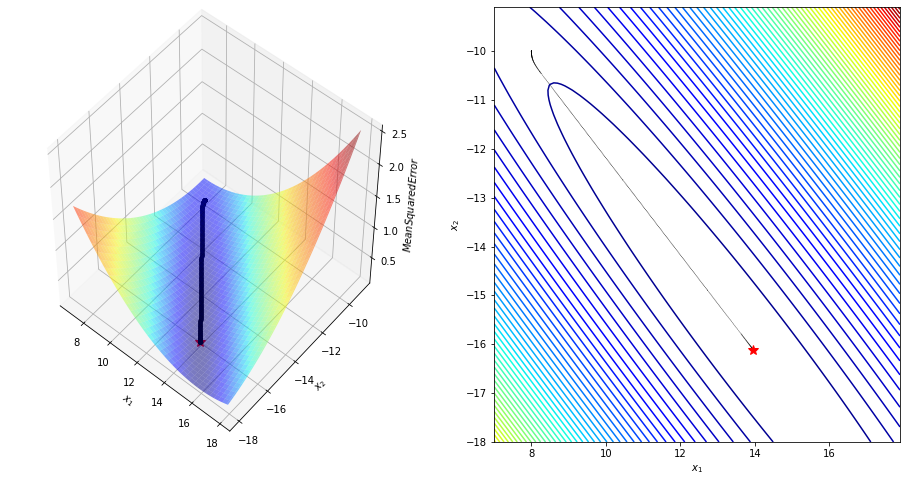

In [46]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RMSProp, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.6, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	f(x)		f(x) - f*	rate
   0	3.5497e+01	3.5020e+01
 100	4.7907e-01	2.5313e-03	7.2281e-05
 200	4.7729e-01	7.5732e-04	2.9918e-01
 300	4.7726e-01	7.2975e-04	9.6359e-01
 400	4.7726e-01	7.3046e-04	1.0010e+00
 500	4.7726e-01	7.3045e-04	9.9998e-01
 600	4.7726e-01	7.3045e-04	1.0000e+00
 700	4.7726e-01	7.3045e-04	1.0000e+00
 800	4.7726e-01	7.3045e-04	1.0000e+00
 900	4.7726e-01	7.3045e-04	1.0000e+00
1000	4.7726e-01	7.3045e-04	1.0000e+00

[-0.15856871 -0.19846948]


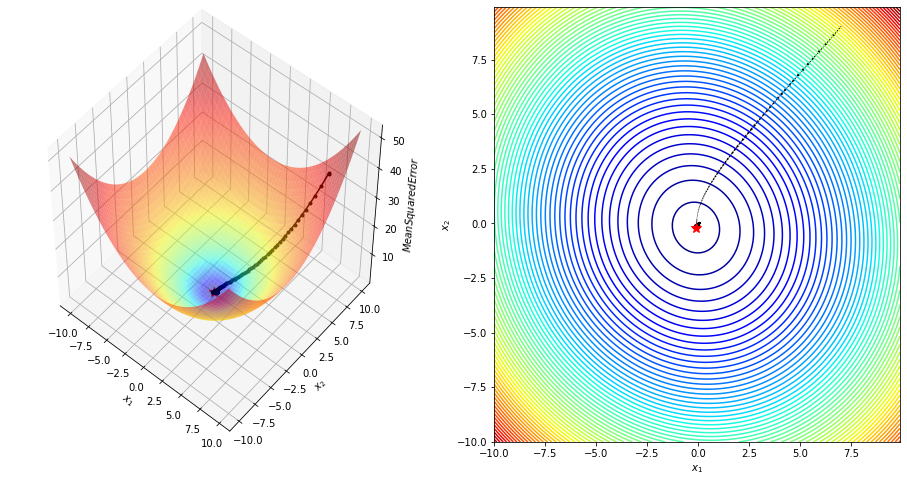

In [47]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RMSProp, learning_rate=0.2, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)